In [2]:
#p1810677
#Nathan Bouret
#Score: 0.9561

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
'@author:Nathan Bouret'

'@author:Nathan Bouret'

TP Prix des voitures d'occasion 
On commence par importer les données, ici de Mercedes parce que Mercedes > Audi

J ai choisi Mercedes, mais on peut facilement changer de fabricant en changeant le lien ci-desosus

In [4]:
data_merc = pd.read_csv('archive/merc.csv') #on peut mettre ford.csv par exemple, rien ne changera
data_merc.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [5]:
data_merc.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

On remarque qu'il n'y a aucune données manquantes, c'est vraiment super chouette. 
On peut s'intéresser à l'age des voitures

In [6]:
age=2020-data_merc['year']
#age
annee=data_merc['year']

In [7]:
dataset=pd.concat([data_merc,age,annee],axis=1)
dataset['age']=age
dataset['annee']=annee
dataset.drop('year',axis=1,inplace=True)
dataset.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age,annee
0,SLK,5200,Automatic,63000,Petrol,325,32.1,1.8,15,2005
1,S Class,34948,Automatic,27000,Hybrid,20,61.4,2.1,3,2017
2,SL CLASS,49948,Automatic,6200,Petrol,555,28.0,5.5,4,2016
3,G Class,61948,Automatic,16000,Petrol,325,30.4,4.0,4,2016
4,G Class,73948,Automatic,4000,Petrol,325,30.1,4.0,4,2016


/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='count'>

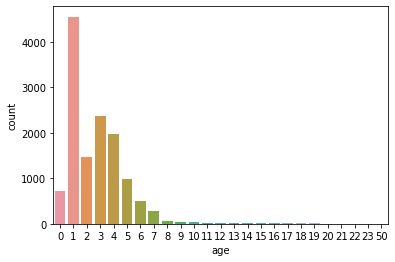

In [8]:
sns.countplot(dataset['age'])

On fait un plot des résidus des regressions de x en fonction de y du mileage(1 mile=1.6km) en fonction du prix, puis de l'age du véhicule 

/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mileage', ylabel='price'>

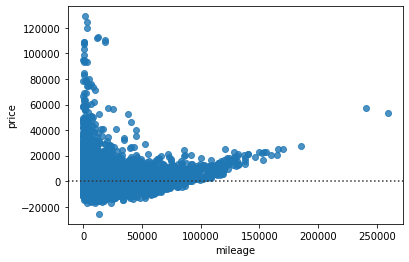

In [9]:

sns.residplot(dataset['mileage'], dataset['price'] )

/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mpg', ylabel='price'>

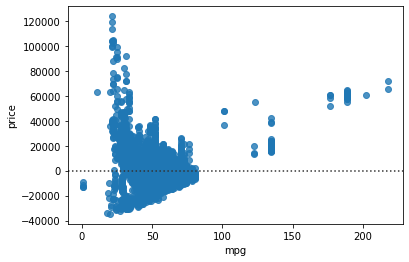

In [10]:
sns.residplot(dataset['mpg'],dataset['price'])

On plot les données du prix en fonction de l'age du vehicule 

/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price', ylabel='age'>

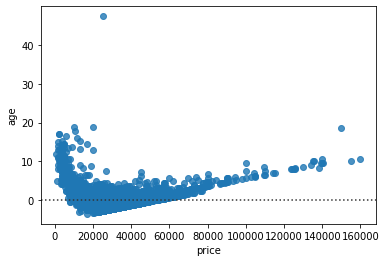

In [11]:
sns.residplot(dataset['price'],dataset['age'])

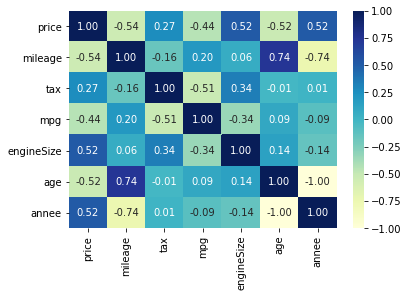

In [12]:
corr_numerique1=sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "YlGnBu")

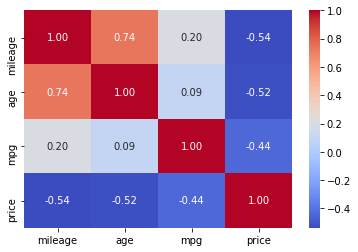

In [13]:
corr_numerique2 = sns.heatmap(dataset[["mileage","age","mpg","price"]].corr(),
                           annot=True, fmt = ".2f", cmap = "coolwarm")

On remarque, que plus le mpg (consommation (miles per gallon)) est elevé, moins le prix l'est (coef de corrélation est négatif.) De plus, plus le véhicule est vieux est plus il consomme, moins le prix l'est.
<br>
En revanche, plus le véhicule est vieux.. plus il a roulé, et plus il a une consommation de carburant elevé.

/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

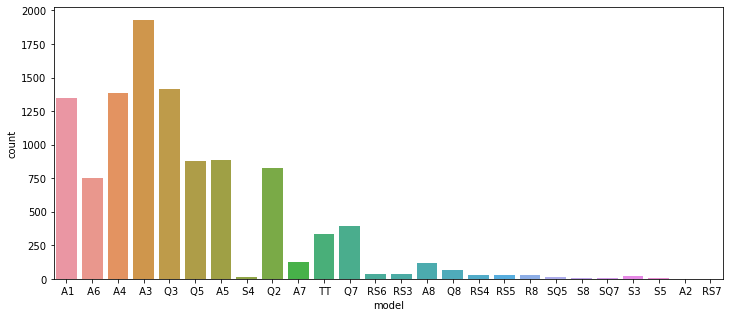

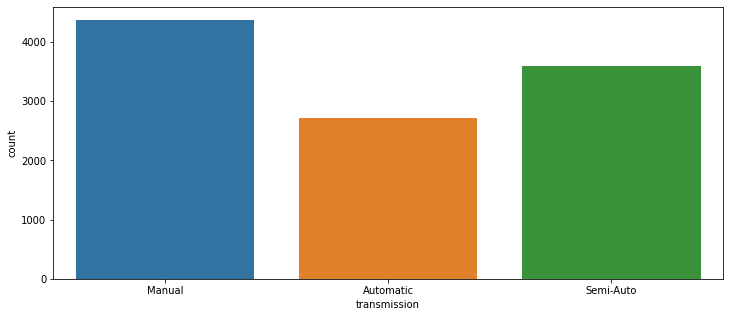

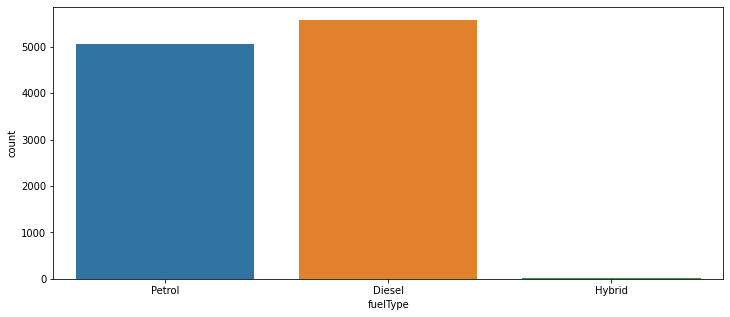

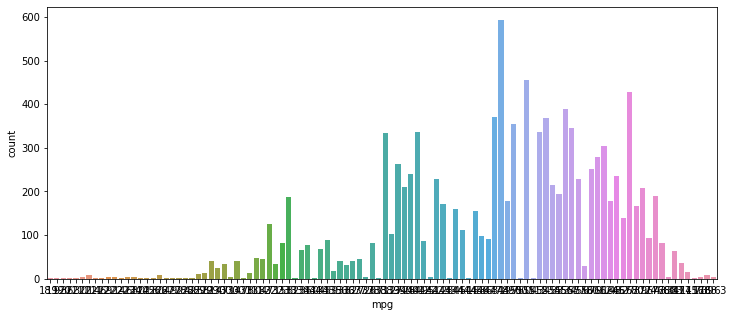

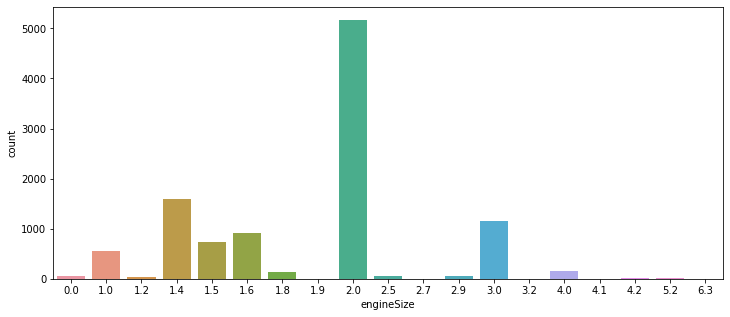

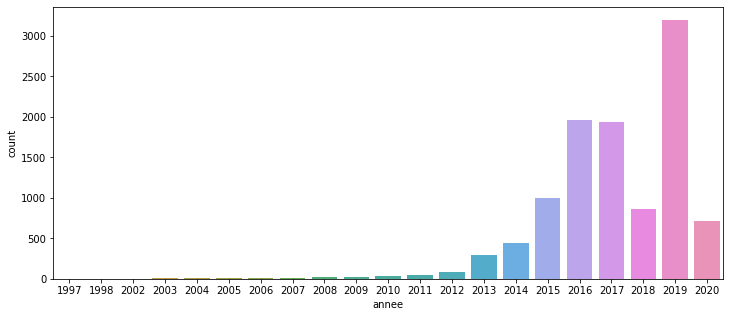

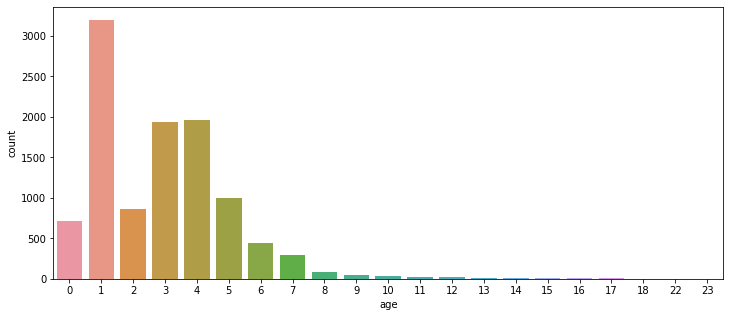

In [45]:
dico = ['model', 'transmission', 'fuelType', 'mpg','engineSize', 'annee','age']
for i in dico:
    plt.figure(figsize=(12, 5))
    sns.countplot(dataset[i])
    plt.show()


In [14]:
le=LabelEncoder()
dataset['fuelType']=le.fit_transform(dataset['fuelType'])
dataset['transmission']=le.fit_transform(dataset['transmission'])
dataset['model']=le.fit_transform(dataset['model'])

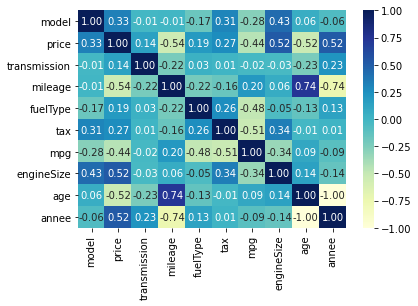

In [15]:
corr_numerique3=sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "YlGnBu")


<AxesSubplot:xlabel='model', ylabel='price'>

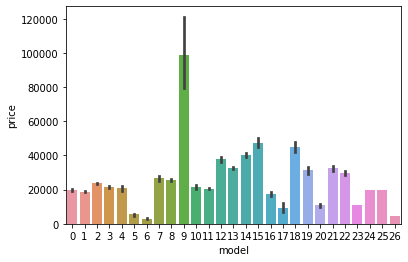

In [16]:
sns.barplot(x='model', y='price', data=dataset)


On commnence notre modèle

In [17]:
y = dataset["price"]
x = dataset.drop("price", axis=1)
K_fold = StratifiedKFold(n_splits=10)



In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
modele=MLPClassifier(random_state=2)
modele.fit(x_train, y_train)
prediction=MLPClassifier.predict(x_test)
MLPscore=MLPClassifier.score(x,y)

/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
MLPscore

C'est incroyablement lent. J'en ai eu marre, je lance un petit coup de regression linéaire, pour la forme

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr1 = LinearRegression()
lr1.fit(x_train, y_train)
chap = lr1.predict(x_test)

In [20]:
lescore = r2_score(chap, y_test)
print('Le score r^2 pour la  Regression Linéaire est {}'.format(lescore))

Le score r^2 pour la  Regression Linéaire est 0.6138362414298195


/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


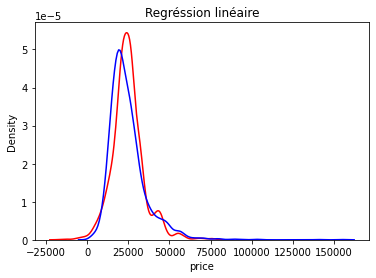

In [21]:
sns.distplot(chap, hist=False, color='r', label='predit')
sns.distplot(y_test, hist=False, color='b', label='prix actuel')
plt.title("Regréssion linéaire")
plt.show()

On essaye aussi avec le RandomForestRegressor pour essayer d'avoir un meilleur score

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators= 1000, random_state=0)
rfr.fit(x_train,y_train)
chap2=rfr.predict(x_test)

In [23]:
lescoreRFR = r2_score(chap2, y_test)
print('Le score r^2 pour la  Random Forest Regressor {}'.format(lescoreRFR))


Le score r^2 pour la  Random Forest Regressor 0.9561636744613506


/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/bouret/.conda/envs/CarsTP/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


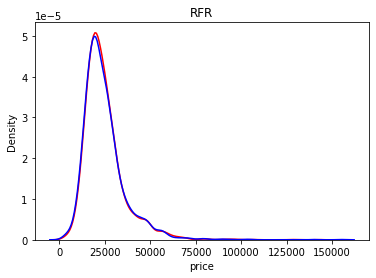

In [24]:
sns.distplot(chap2, hist=False, color='r', label='predit')
sns.distplot(y_test, hist=False, color='b', label='prix actuel')
plt.title("RFR")
plt.show()

In [25]:
Loo=LeaveOneOut()
Loo.split(x_train)

<generator object BaseCrossValidator.split at 0x126cb8ed0>

on definit la fonction qui nous servira pour calculer le score

In [26]:
def mafonctionscore (x,y):
    score=0
    #on suppose que x et y ont la meme taille sinon ca na pas de sens
    for i in range(len(x)):
        score+=(x[i]-y[i])**2
    return score

In [27]:
#taille=len(dataset['price'])
predit=np.zeros(1000) #on devrait aller jusqua taille mais mon ordinateur met trop de temps a calculer
Vprix=np.zeros(1000)
copdata=dataset

for i in range (1000):
    copdata.drop(index=i)
    price=copdata['price']
    copdata.drop(columns=['price'])
    copi=copdata.loc[i]
    Vprix[i]=copi['price']  
    copi.drop(['price'])
    copi=copi.to_numpy() #on converti en tableau numpy
    #rfr2=RandomForestRegressor(n_estimators= 1000, random_state=0)
    rfr2=LinearRegression().fit(copdata,price)
    monModele = rfr2.fit(copdata,price)
    predit[i]=monModele.predict(copi.reshape(1,-1))

J'aurai voulu le faire avec rfr2=RandomForestRegressor mais le temps de calcul est trop long. On fait donc avec le modele linéaire 

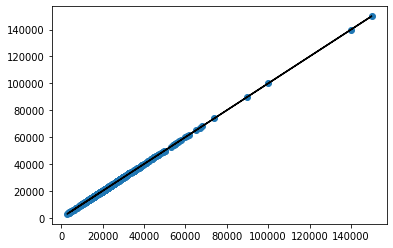

In [28]:
plt.scatter(Vprix,predit)
plt.plot(Vprix,Vprix,"k")

On obtient le score que vous voulez Mr. Clopeau

In [30]:
print("Mon score est {}".format(mafonctionscore(Vprix,predit)))

Mon score est 1.8215840577397754e-19


On obtient un score qui est de  1.8215840577397754e-19. De plus, on voit que nos prix estimés suivent bien la diagonale.
